# Assignment05 : Computation of Image Features using Convolution
# Name : Eun-Mi Joo
# Student ID : 20155714
# GitHub Link : https://github.com/joo228/assignment.git

# import package for plotting, data management and dealing image

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import signal
from skimage import io, color
from skimage import exposure

# read image and change to gray image

In [3]:
file_image= 'cau.jpg'

im_color = io.imread(file_image)
im_gray  = color.rgb2gray(im_color)

# define kernel for computing gradient, smoothing and sharpening image

## 1. gradient : using sober operator
$G_x = \begin{bmatrix}+1& 0& -1 \\ +2& 0& -2 \\ +1 & 0 & -1\end{bmatrix}*Image$, $G_y = \begin{bmatrix}+1& +2& +1 \\ 0& 0& 0 \\ -1 & -2 & -1\end{bmatrix}*Image$

In [4]:
x_derivate = np.array([[+1, 0, -1],[+2, 0, -2],[+1, 0, -1]])
y_derivate = np.array([[+1, +2, +1],[0, 0, 0],[-1, -2, -1]])

## 2. smoothing : using Gaussian operator
$g(x,y)={1\over(2\pi\sigma^2)} e^{-(x^2+y^2)\over2\sigma^2}$

In [5]:
gaussian = np.zeros((5,5),dtype=float)
sigma = 1
for i in range(5):
    for j in range(5):
        gaussian[i,j]=(1/(2*math.pi*sigma**2))*math.exp(-((i-2)**2+(j-2)**2)/2*sigma**2)

## 3. sharpening : using Laplace operator
$sharpen =  \begin{bmatrix}0& 1& 0 \\ 1& -4& 1 \\ 0 & 1 & 0\end{bmatrix}*Image$

In [30]:
sharpen = np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]])

# compute convolution for 3 purpose
## 1. gradient
### a) derivative in x-direction

In [25]:
conv_x_derivate = signal.convolve2d(im_gray, x_derivate, boundary='symm', mode='same')

### b) derivative in y-direction

In [26]:
conv_y_derivate = signal.convolve2d(im_gray, y_derivate, boundary='symm', mode='same')

## 2. smoothing

In [27]:
conv_smooth = signal.convolve2d(im_gray, gaussian, boundary='symm', mode='same')

## 3. sharpen

In [35]:
conv_sharpen = signal.convolve2d(im_gray, sharpen, boundary='symm', mode='same')
sharpen_image = im_gray + conv_sharpen
sharpen_image = sharpen_image - np.min(sharpen_image)
sharpen_image = sharpen_image * (255.0/np.max(sharpen_image))
sharpen_image = exposure.equalize_hist(sharpen_image)

# plot input image for color and gray, derivative in x, y direction, smoothing and sharpening image

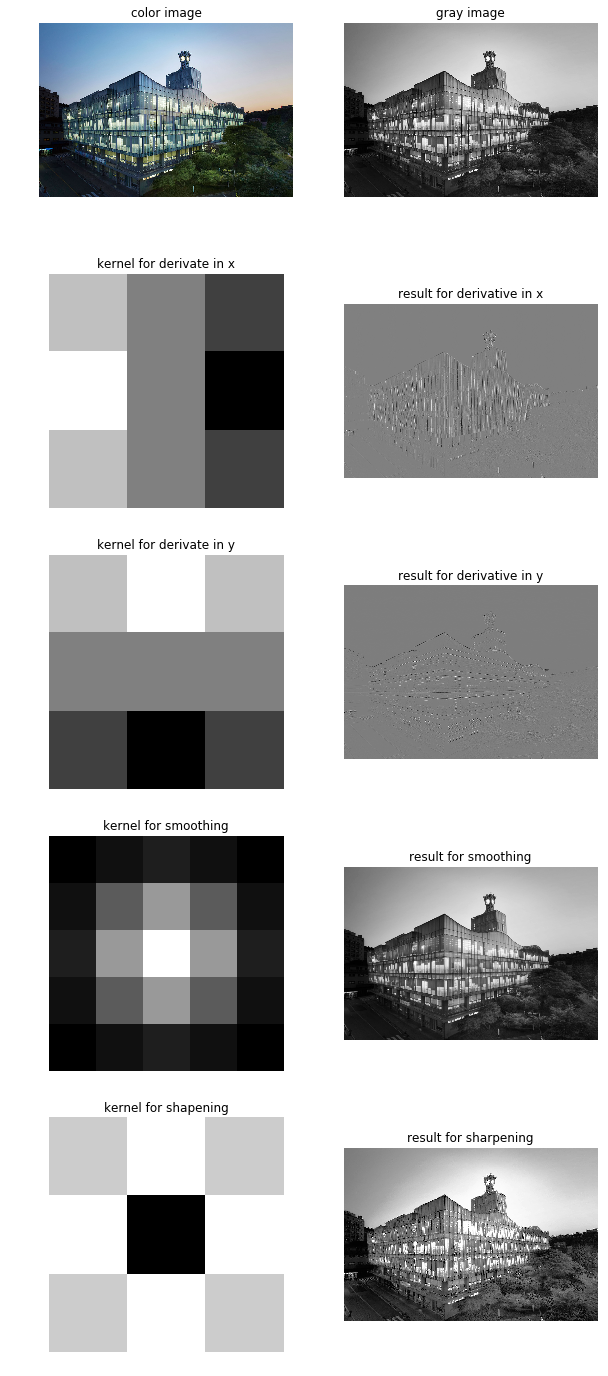

In [36]:
plt.subplots(0,0,figsize=(10,25))
p1 = plt.subplot(5,2,1)
p1.set_title('color image')
plt.imshow(im_color)
plt.axis('off')

p2 = plt.subplot(5,2,2)
p2.set_title('gray image')
plt.imshow(im_gray, cmap='gray')
plt.axis('off')

p3 = plt.subplot(5,2,3)
p3.set_title('kernel for derivate in x')
plt.imshow(x_derivate, cmap='gray')
plt.axis('off')

p4 = plt.subplot(5,2,4)
p4.set_title('result for derivative in x')
plt.imshow(conv_x_derivate, cmap='gray')
plt.axis('off')

p5 = plt.subplot(5,2,5)
p5.set_title('kernel for derivate in y')
plt.imshow(y_derivate, cmap='gray')
plt.axis('off')

p6 = plt.subplot(5,2,6)
p6.set_title('result for derivative in y')
plt.imshow(conv_y_derivate, cmap='gray')
plt.axis('off')

p7 = plt.subplot(5,2,7)
p7.set_title('kernel for smoothing')
plt.imshow(gaussian, cmap='gray')
plt.axis('off')

p8 = plt.subplot(5,2,8)
p8.set_title('result for smoothing')
plt.imshow(conv_smooth, cmap='gray')
plt.axis('off')

p9 = plt.subplot(5,2,9)
p9.set_title('kernel for shapening')
plt.imshow(sharpen, cmap='gray')
plt.axis('off')

p10 = plt.subplot(5,2,10)
p10.set_title('result for sharpening')
plt.imshow(sharpen_image, cmap='gray')
plt.axis('off')

plt.show()

# define function for computing magnitude of gradient

In [13]:
def magnitude_gradient(xDerivative, yDerivative):
    magnitude = np.zeros((xDerivative.shape),dtype=float)
    for i in range(xDerivative.shape[0]):
        for j in range(xDerivative.shape[1]):
            magnitude[i,j]=np.sqrt(xDerivative[i,j]**2+yDerivative[i,j]**2)
    return magnitude

# define function for computing direction of gradient

In [18]:
def direction_gradient(xDerivative, yDerivative):
    direction = np.zeros((xDerivative.shape),dtype=float)
    for i in range(xDerivative.shape[0]):
        for j in range(xDerivative.shape[1]):
            direction[i,j]=math.atan(yDerivative[i,j]/xDerivative[i,j])
    return direction

# plot magnitude and direction of gradient

c:\users\주은미\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
c:\users\주은미\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


(-0.5, 1967.5, 1346.5, -0.5)

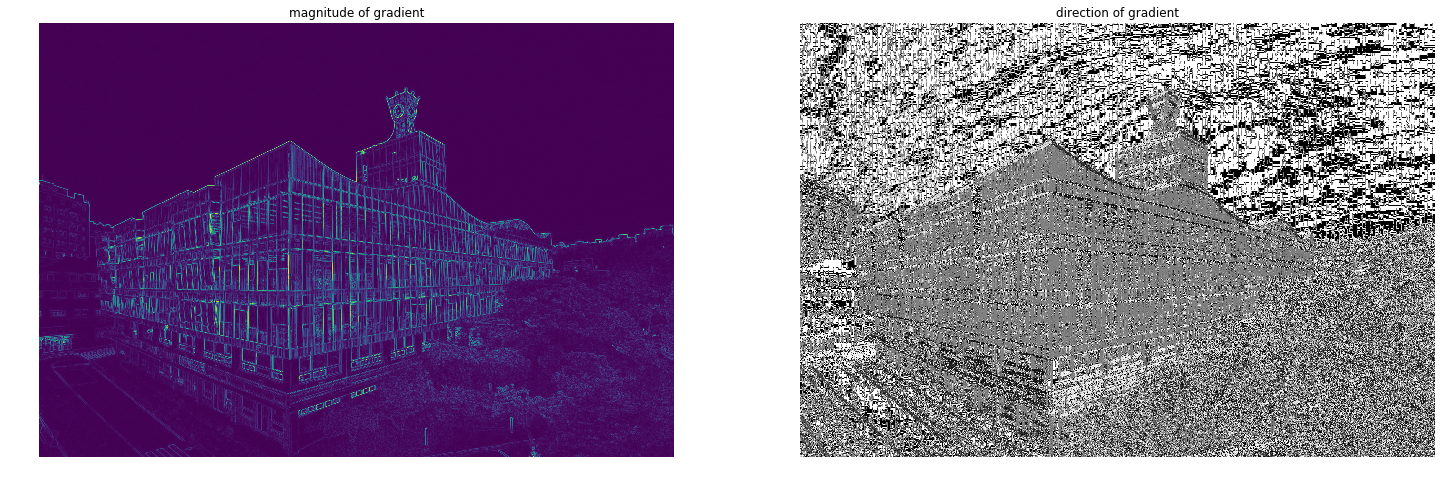

In [19]:
plt.subplots(0,0,figsize=(25,25))
p11 = plt.subplot(1,2,1)
p11.set_title('magnitude of gradient')
plt.imshow(magnitude_gradient(conv_x_derivate, conv_y_derivate))
plt.axis('off')

p12 = plt.subplot(1,2,2)
p12.set_title('direction of gradient')
plt.imshow(direction_gradient(conv_x_derivate,conv_y_derivate), cmap='gray')
plt.axis('off')